In [2]:
import cv2 
import numpy as np 
import time
import matplotlib.pyplot as plt

In [328]:


# Parametros
filename = "foto3.jpg"

real_height = 400   # mm
image_height = 1080 # pixels
sensor_height = 5.4 # mm  
focal_length = 18   # mm

def calculate_distance(radius):
    # https://photo.stackexchange.com/questions/12434/how-do-i-calculate-the-distance-of-an-object-in-a-photo
    dem = focal_length * real_height * image_height 
    num = sensor_height * 2*radius 
    
    distance_meters = dem/num/1000 

    return distance_meters # meters


Faz o pre processamento da imagem para colocar nas funções de detecção de circulos

In [227]:
# Read image. 
img = cv2.imread(filename, cv2.IMREAD_COLOR) 

def blur_image(img, kernel=3,ERO=False,DIL=False,kernel2=3):
    # blur image, and maybe Erode and Dilate

    # Convert to grayscale. 
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

    # Blur using kernel. 
    gray_blurred = cv2.blur(img, (kernel, kernel)) 

    # gray_blurred = cv2.medianBlur(gray, 3) 
    
    
    if ERO:
        ero = cv2.erode(gray_blurred, np.ones((kernel2 ,kernel2)))
        gray_blurred = ero
    if DIL:
        dil = cv2.dilate(gray_blurred, np.ones((kernel2,kernel2)))
        gray_blurred = dil

    return gray_blurred

processed_img = blur_image(img,kernel=3)

cv2.imshow('teste',processed_img)
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

In [314]:
# TENTANDO VIA FILTRO DE COR
# Chutei uma cor para filtrar em uma imagem especifica. Foi o que deu mais resultado até agora.

img = cv2.imread(filename, cv2.IMREAD_COLOR) 


lower_blue = np.array([0, 0, 0]) 
upper_blue = np.array([255, 255, 150]) 

img = cv2.blur(img, (3, 3)) 
processed_img = img

ero = cv2.erode(img, np.ones((5, 5)))
processed_img = ero

dil = cv2.dilate(processed_img, np.ones((3,3)))
processed_img = dil


# preparing the mask to overlay 
mask = cv2.inRange(processed_img, lower_blue, upper_blue) 

result = cv2.bitwise_and(processed_img,processed_img,mask = mask) 
processed_img = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY) 


# cv2.imshow("filtro",ero)
# plt.show()
# cv2.waitKey()
# cv2.destroyAllWindows()

# # cv2.imshow("filtro",gray_blurred)
# # plt.show()
# # cv2.waitKey()
# # cv2.destroyAllWindows()

# cv2.imshow("filtro",img)
# plt.show()
# cv2.waitKey()
# cv2.destroyAllWindows()

cv2.imshow("filtro",result)
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# Apply Hough transform 
detected_circles = cv2.HoughCircles(processed_img,  
                   cv2.HOUGH_GRADIENT, 2, 50, param1 = 50, # param1 = 50, param2= 10
                    param2 = 10, minRadius = 2, maxRadius =8) 

# print(len(detected_circles))
# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    # print(detected_circles)
    # detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
        a, b, r = np.uint16((a,b,r))

        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 1) 
        cv2.circle(processed_img, (a, b), r, (0, 255, 0), 1) 

        text = str( round(calculate_distance(pt[2])) )

        # cv2.putText(processed_img,text,(a,b),fontFace=1,fontScale=1,color=255)
        cv2.putText(img,text,(a,b),fontFace=1,fontScale=1,color=255)

cv2.imshow("Detected Circle", processed_img) 
plt.show()
cv2.waitKey(0) 
cv2.destroyAllWindows()


cv2.imshow("Detected Circle", img) 
plt.show()
cv2.waitKey(0) 
cv2.destroyAllWindows()


In [155]:
# Salvar a figura
cv2.imwrite("circles_output_"+ filename, img) 

True

## Tentar selcionar por click
Deu muito certo essa tentativa não

A ideia era clicar nas bolas, para pegar as cores dela

In [285]:
img = cv2.imread(filename, cv2.IMREAD_COLOR) 

def click_event(event, x, y, flags, params): 
    global pos_click
    # checking for left mouse clicks 
    if event == cv2.EVENT_LBUTTONDOWN: 
  
        # displaying the coordinates 
        # on the Shell 
        pos_click.append([x,y])
        print(x, ' ', y) 
  
        # displaying the coordinates 
        # on the image window 
        # font = cv2.FONT_HERSHEY_SIMPLEX 
        # cv2.putText(img, str(x) + ',' +
        #             str(y), (x,y), font, 
        #             1, (255, 0, 0), 2) 
        cv2.imshow('image', img) 

    return x

pos_click = []
cv2.imshow('image',img)
plt.show()
cv2.setMouseCallback('image', click_event) 

cv2.waitKey(0)
cv2.destroyAllWindows()

print(pos_click)

677   445
750   732
1142   159
1108   568
[[677, 445], [750, 732], [1142, 159], [1108, 568]]


In [286]:
# COLOR_BGR 2 RGB
def change_rgb(input):
    # return [input[1], input[2],input[0]]
    return [input[2], input[1],input[0]]

change_rgb([1,2,3])

[3, 2, 1]

(3, 4, 3)


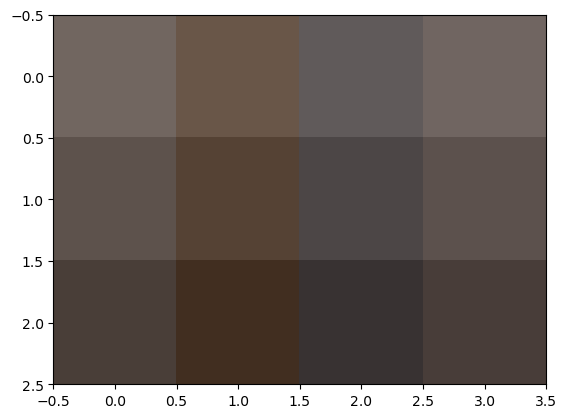

In [287]:
limiar = 20

colors = []
for i in range(len(pos_click)):
    # print(pos_click[i])
    colors.append(change_rgb(img[pos_click[i][1]][pos_click[i][0]] ))
    # print( img[pos_click[i][1]][pos_click[i][0]] )

colors_min_max = [colors + limiar*np.ones(np.shape(colors),dtype=int) , colors, colors - limiar*np.ones(np.shape(colors),dtype=int)]
print(np.shape(colors_min_max))
plt.imshow(colors_min_max)
plt.show()
# print(np.shape(colors) )

In [288]:
folga = 10


def unions(a):
    # a = [(7, 10), (11, 13), (11, 15), (14, 20), (23, 39)]
    b = []
    for begin,end in sorted(a):
        if b and b[-1][1] >= begin - 1:
            b[-1][1] = max(b[-1][1], end)
        else:
            b.append([begin, end])
    return b

# unions(B_intervals)

# mask = cv2.inRange(processed_img, lower_thr, upper_thr) 

def create_composite_mask(img,colors, folga=10):
    
    R_intervals = [(c[0]-folga,c[0]+folga) for c in colors]
    G_intervals = [(c[1]-folga,c[1]+folga) for c in colors]
    B_intervals = [(c[2]-folga,c[2]+folga) for c in colors]

    mask_R = np.zeros(img.shape[:2])
    mask_G = np.zeros(img.shape[:2])
    mask_B = np.zeros(img.shape[:2])
    for R in R_intervals:
        # print(R[0], R[1])
        mask_R = (mask_R + cv2.inRange(img, 
                                     np.array([R[0],0,0]), 
                                     np.array([R[1],255,255]) 
                                     )  # bitwise or
                )
    mask_R = mask_R.clip(0,255)
    for G in G_intervals:
        mask_G = (mask_G + cv2.inRange(img, 
                                     np.array([0,G[0],0]), 
                                     np.array([255,G[1],255]) 
                                     )  # bitwise or
                )
    mask_G = mask_G.clip(0,255)

    for B in B_intervals:
        mask_B = (mask_B + cv2.inRange(img, 
                                     np.array([0,0,B[0]]), 
                                     np.array([255,255,B[1]]) 
                                     )  # bitwise or
                )
    mask_B = mask_B.clip(0,255)
    
    # return mask_R,mask_G,mask_B
    return (np.multiply(mask_R,np.multiply(mask_B,mask_G) )/255/255).astype(np.uint8)

mask = create_composite_mask(img,colors, folga=10)

In [289]:
np.shape(colors)[0]

# R, G, B
def calculate_color_threshold(colors,folga):
    R = [colors[i][0] for i in range(np.shape(colors)[0])]
    G = [colors[i][1] for i in range(np.shape(colors)[0])]
    B = [colors[i][2] for i in range(np.shape(colors)[0])]

    lower_thr = [min(R), min(G), min(B)] - folga*np.ones((1,3))
    upper_thr = [max(R), max(G), max(B)] + folga*np.ones((1,3))
    return lower_thr, upper_thr

calculate_color_threshold(colors,10)

TypeError: 'numpy.uint8' object is not callable

In [291]:
def preprocess_img(filename,colors,folga = 10, show_graph = False):
    # TENTANDO VIA FILTRO DE COR
    img = cv2.imread(filename, cv2.IMREAD_COLOR) 

    lower_thr, upper_thr = calculate_color_threshold(colors,folga)


    img = cv2.blur(img, (3, 3)) 
    processed_img = img

    ero = cv2.erode(img, np.ones((5, 5)))
    processed_img = ero

    dil = cv2.dilate(processed_img, np.ones((3,3)))
    processed_img = dil


    # preparing the mask to overlay 
    # mask = cv2.inRange(processed_img, lower_thr, upper_thr) 
    mask = create_composite_mask(processed_img, colors, folga)

    result = cv2.bitwise_and(processed_img,processed_img,mask = mask) 
    processed_img = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY) 

    if show_graph:
        cv2.imshow("Imagem Filtrada de cor",result)
        plt.show()
        cv2.waitKey()
        cv2.destroyAllWindows()

    return processed_img


preprocess_img(filename,colors,folga = 30, show_graph = True)

TypeError: 'numpy.uint8' object is not callable

In [560]:
# Apply Hough transform 
detected_circles = cv2.HoughCircles(processed_img,  
                   cv2.HOUGH_GRADIENT, 2, 50, param1 = 50, # param1 = 50, param2= 10
               param2 = 10, minRadius = 1, maxRadius =8) 

r_folga = 10
new_detected_circles = [pt for pt in detected_circles[0, :] if any([(i[0]-pt[0])**2 + (i[1]-pt[1])**2 <= r + r_folga for i in pos_click])]

new_detected_circles

[array([1141. ,  159. ,    6.8], dtype=float32),
 array([1085. ,  785. ,    3.4], dtype=float32),
 array([749., 733.,   4.], dtype=float32)]

In [561]:
# Apply Hough transform 
detected_circles = cv2.HoughCircles(processed_img,  
                   cv2.HOUGH_GRADIENT, 2, 50, param1 = 50, # param1 = 50, param2= 10
               param2 = 10, minRadius = 1, maxRadius =8) 

r_folga = 10

# print(len(detected_circles))
# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    # print(detected_circles)
    # detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2]
        # (x-x0)^2 + (y-y0)^2 <= r 
        if True:
            a, b, r = np.uint16((a,b,r))

            # Draw the circumference of the circle. 
            cv2.circle(img, (a, b), r, (0, 255, 0), 1) 
            cv2.circle(processed_img, (a, b), r, (0, 255, 0), 1) 

            # Draw a small circle (of radius 1) to show the center. 
            # cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
            # cv2.imshow("Detected Circle", img) 
            # time.sleep(1)
            text = str( round(calculate_distance(pt[2])) )
            # text = str( round(pt[2],1) )

            # print(text)
            # cv2.putText(gray_blurred,text,(a,b),fontFace=1,fontScale=1,color=255)
            cv2.putText(img,text,(a,b),fontFace=1,fontScale=1,color=255)

cv2.imshow("Detected Circle", processed_img) 
plt.show()
cv2.waitKey(0) 
cv2.destroyAllWindows()


cv2.imshow("Detected Circle", img) 
plt.show()
cv2.waitKey(0) 
cv2.destroyAllWindows()


## Testes anteriores

In [ ]:
# Read image. 
img = cv2.imread(filename, cv2.IMREAD_COLOR) 
# print(img)
# img = result



# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
# gray = cv2.cvtColor(img, 83) 


# Blur using 3 * 3 kernel. 
processed_img = cv2.blur(gray, (3, 3)) 



# # # Adaptive thresholding to handle varying lighting and shadows
# adaptive_thresh = cv2.adaptiveThreshold(
#     gray_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 1
# )
# gray_blurred = adaptive_thresh

# Use morphological closing to fill gaps caused by shadows
kernel = np.ones((3, 3), np.uint8)
closed = cv2.morphologyEx(processed_img, cv2.MORPH_CLOSE, kernel)
processed_img = closed

canny = cv2.Canny(processed_img,50,10)

cv2.imshow('teste',processed_img)
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

In [292]:
canny = cv2.Canny(processed_img,50,10)

cv2.imshow('teste',canny)
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
cv2.destroyAllWindows()

# Calculo por matematica

In [35]:
altura_torre = 115360 + 9640 
altura_camera = 12000 + 4360 + 12000 + 2500
metade_horizontal = 14300
offset_horizontal = 0 
camera_horizontal = metade_horizontal - offset_horizontal

tamanho_vao = 824 ## verificar
tamanho_cabo = 1200 ## verificar

ratio = tamanho_cabo/tamanho_vao

In [36]:
altura_camera/altura_torre

0.24688

In [37]:
from sympy.functions.elementary.hyperbolic import cosh, sinh

def catenary(x, a,b,c):
    return c + a*cosh((x-b)/a)

In [38]:
catenary(1,1,0,0)

1.54308063481524

In [68]:
from sympy import Symbol, nsolve, sqrt
import random

argA = Symbol('a')
argB = Symbol('b')
argC = Symbol('c')

x1 = 0
y1 = 1000
x2 = tamanho_vao
y2 = y1

ratio = 1.5

nsolve((catenary(x1,argA,argB,argC)-y1,
        catenary(x2,argA,argB,argC)-y2,     
        ratio*sqrt(x2^2 + (y2-y1)^2) - argA *(sinh((x2-argB)/argA) + sinh(argB/argA))
        ), 
       (argA, argB, argC), 
       (random.random()*10+1,x2/2,y1))

ZeroDivisionError: matrix is numerically singular

True

# Depth Anything V2

In [5]:
import cv2
import torch 
import numpy as np
# from Depth-Anything-V2.depth_anything_v2.dpt import DepthAnythingV2
import importlib
dpt = importlib.import_module("Depth-Anything-V2.depth_anything_v2.dpt")
DepthAnythingV2 = dpt.DepthAnythingV2

util_transform = importlib.import_module("Depth-Anything-V2.depth_anything_v2.util.transform")

filename='foto3.jpg'
torch.cuda.is_available()


True

In [32]:
import math

def filter_detection(roi, r, circ_thresh=0.6, fill_thresh=0.6):
    """
    Check if the ROI (grayscale) is near-circular and filled.
    Uses Otsu's thresholding and contour analysis.
    Returns True if both circularity and fill ratio exceed the thresholds.
    """
    ret, binary = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return False
    cnt = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    if perimeter == 0:
        return False
    circularity = 4 * math.pi * (area / (perimeter * perimeter))
    expected_area = math.pi * (r ** 2)
    fill_ratio = area / expected_area if expected_area > 0 else 0
    return (circularity >= circ_thresh) and (fill_ratio >= fill_thresh)


Crop the image, so its size is multiple of 14

In [ ]:
# https://github.com/DepthAnything/Depth-Anything-V2?tab=readme-ov-file
torch.cuda.empty_cache()
print("Memory allocated", torch.cuda.memory_allocated()/1024/1024/1024,"Gb")

DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print("DEVICE:", DEVICE)

model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}
    
encoder = 'vitb' # or 'vits', 'vitl', 'vitg'

depth_anything = DepthAnythingV2(**model_configs[encoder])
depth_anything.load_state_dict(torch.load(f'Depth-Anything-V2/depth_anything_v2_{encoder}.pth', map_location='cpu'))
depth_anything = depth_anything.to(DEVICE).eval()

raw_image = cv2.imread(filename)

# Crop the image, so its size is multiple of 14
a,b,_ = raw_image.shape
np.floor(a/14)*14
np.floor(b/14)*14
raw_image = raw_image[:int(np.floor(a/14)*14),:int(np.floor(b/14)*14),:]


depth = depth_anything.infer_image(raw_image,   np.floor(a/14)*14)

depth = (depth - depth.min()) / (depth.max() - depth.min()) * 255.0
depth = depth.astype(np.uint8)

depth
print(depth.min(), depth.max())

Memory allocated 0.0 Gb
DEVICE: cuda
0.0 6.939051


In [7]:
depth = (depth - depth.min()) / (depth.max() - depth.min()) * 255.0
depth = depth.astype(np.uint8)

cv2.imshow('depth',depth)

cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
processed_img = depth.copy()

canny = cv2.Canny(processed_img,50,50)

cv2.imshow('teste',canny)
plt.show()
cv2.waitKey() 
cv2.destroyAllWindows()

In [9]:
import matplotlib.pyplot as plt

In [10]:
def check_depth_in_a_circle(depth, pt):
    x,y = pt[0],pt[1]
    r = pt[2]

    # print(x,y,r)
    ix_min, ix_max = (np.max([np.floor(x-r),0]).astype(int), np.min([np.ceil(x+r),1918-1]).astype(int))
    iy_min, iy_max = (np.max([np.floor(y-r),0]).astype(int), np.min([np.ceil(y+r),1078-1]).astype(int))

    max = 0
    for ix in range(ix_min, ix_max):
        for iy in range(iy_min, iy_max):
            if( (ix-x)**2 + (iy-y)**2 <= r**2):
                # print(ix,iy,depth[iy,ix],depth[iy,ix]>max)
                if depth[iy,ix] > max:
                    max = depth[iy,ix]
                # else:
                #     if max == 0:
                #         print('depth: ',depth[iy,ix])


    # cv2.rectangle(raw_image, [ix_min,iy_max], [ix_min+10,iy_max-10], color = (0, 255, 0), thickness=1)
    # cv2.rectangle(raw_image, [ix_min,iy_min], [ix_max,iy_max], color = (255, 0, 0), thickness=1)
    # cv2.putText(raw_image,"oi",(x,y),fontFace=1,fontScale=1,color=255)

    return max

check_depth_in_a_circle(depth, [10,10,3])

0

In [43]:
# TENTANDO VIA FILTRO DE COR
# Chutei uma cor para filtrar em uma imagem especifica. Foi o que deu mais resultado até agora.

raw_image = cv2.imread(filename)
a,b,_ = raw_image.shape
np.floor(a/14)*14
np.floor(b/14)*14
raw_image = raw_image[:int(np.floor(a/14)*14),:int(np.floor(b/14)*14),:]


# preparing the mask to overlay 
mask = cv2.inRange(raw_image, lower_blue, upper_blue) 
result = cv2.bitwise_and(raw_image,raw_image,mask = mask) 
processed_img = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY) 


lower_blue = np.array([0, 0, 0]) 
upper_blue = np.array([255, 255, 150]) 

img = cv2.blur(raw_image, (3, 3)) 
processed_img = img

ero = cv2.erode(img, np.ones((5, 5)))
processed_img = ero

dil = cv2.dilate(processed_img, np.ones((3,3)))
processed_img = dil


# # preparing the mask to overlay 
# mask = cv2.inRange(processed_img, lower_blue, upper_blue) 
# result = cv2.bitwise_and(processed_img,processed_img,mask = mask) 
# processed_img = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY) 


# cv2.imshow("filtro",ero)
# plt.show()
# cv2.waitKey()
# cv2.destroyAllWindows()

# # cv2.imshow("filtro",gray_blurred)
# # plt.show()
# # cv2.waitKey()
# # cv2.destroyAllWindows()

# cv2.imshow("filtro",img)
# plt.show()
# cv2.waitKey()
# cv2.destroyAllWindows()

cv2.imshow("filtro",processed_img)
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# # Apply Hough transform 
# raw_image = cv2.imread(filename)
# a,b,_ = raw_image.shape
# np.floor(a/14)*14
# np.floor(b/14)*14
# raw_image = raw_image[:int(np.floor(a/14)*14),:int(np.floor(b/14)*14),:]

# processed_img = depth.copy()
# processed_img = blur_image(processed_img,3,True,True)


detected_circles = cv2.HoughCircles(processed_img,  
                   cv2.HOUGH_GRADIENT, 2, 50, 
                   param1 = 20,     param2 = 5, # param1 = 50, param2= 10
                   minRadius = 1,   maxRadius =8) 


vector_compare_radius_depth = []

# print(len(detected_circles))
# Draw circles that are detected. 
if detected_circles is not None: 

    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
        a, b, r = np.uint16((a,b,r))
        depth_of_circle  = check_depth_in_a_circle(depth, pt)
        if depth_of_circle < 70:
            continue         

        # Draw the circumference of the circle. 

        # Draw a small circle (of radius 1) to show the center. 
        # cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        
        # Write distances
        text = str( round(calculate_distance(pt[2]) ) ) + '-' +str(round(depth_of_circle))
        # text = str(round(depth_of_circle))
        # text = str( round(pt[2],1) )
        
        
        # Extract ROI for extra filtering
        x_start = max(a - r, 0)
        y_start = max(b - r, 0)
        x_end = min(a + r, processed_img.shape[1])
        y_end = min(b + r, processed_img.shape[0])
        roi = processed_img[y_start:y_end, x_start:x_end]
        
        # Apply extra filtering with relaxed thresholds
        if filter_detection(roi, r, circ_thresh=0.6, fill_thresh=0.6):
            cv2.circle(raw_image, (a, b), r, (0, 255, 0), 1) 
            cv2.circle(processed_img, (a, b), r, (0, 255, 0), 1) 

            # print(text)
            cv2.putText(processed_img,text,(a,b),fontFace=1,fontScale=1,color=255)
            cv2.putText(raw_image,text,(a,b),fontFace=1,fontScale=1,color=255)
            vector_compare_radius_depth.append([a, b, calculate_distance(pt[2]), depth_of_circle])

cv2.imshow("Detected Circle", processed_img) 
plt.show()
cv2.waitKey(0) 
cv2.destroyAllWindows()


cv2.imshow("Detected Circle", raw_image) 
plt.show()
cv2.waitKey(0) 
cv2.destroyAllWindows()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\hough.cpp:2269: error: (-215:Assertion failed) !_image.empty() && _image.type() == CV_8UC1 && (_image.isMat() || _image.isUMat()) in function 'cv::HoughCircles'


In [329]:
def check_depth_in_circles(depth, detected_circles, max_th = 30):
    depth_vector = []
    for pt in detected_circles[0,:]:
        x,y = pt[0],pt[1]
        r = pt[2]

        # print(x,y,r)
        ix_min, ix_max = [np.max([np.floor(x-r),0]).astype(int), np.min([np.ceil(x+r),1080-1]).astype(int)]
        iy_min, iy_max = (np.max([np.floor(y-r),0]).astype(int), np.min([np.ceil(y+r),1920-1]).astype(int))
        
        max = 0
        for ix in range(ix_min, ix_max):
            for iy in range(iy_min, iy_max):
                # (ix,iy)
                if( (ix-x)**2 + (iy-y)**2 <= r**2):
                    # print(ix,iy,depth[iy,ix],depth[iy,ix]>max)
                    if depth[iy,ix] > max:
                        max = depth[iy,ix]
                    # else:
                    #     if max == 0:
                    #         print('depth: ',depth[iy,ix])
        # print('max =',max)
        if max > max_th:
            depth_vector.append([x,y,max])
    return depth_vector


check_depth_in_circles(depth,detected_circles,30)

[[613.0, 473.0, 170],
 [689.0, 737.0, 107],
 [719.0, 841.0, 104],
 [667.0, 673.0, 119],
 [747.0, 945.0, 82],
 [951.0, 983.0, 63],
 [939.0, 877.0, 60],
 [791.0, 1061.0, 68],
 [627.0, 525.0, 145],
 [645.0, 611.0, 136],
 [677.0, 445.0, 167],
 [955.0, 1061.0, 64],
 [561.0, 301.0, 196],
 [603.0, 381.0, 172],
 [525.0, 73.0, 219],
 [699.0, 793.0, 105],
 [561.0, 223.0, 196],
 [539.0, 133.0, 211],
 [797.0, 895.0, 74],
 [729.0, 893.0, 89],
 [769.0, 991.0, 69],
 [749.0, 731.0, 105],
 [479.0, 7.0, 255],
 [991.0, 939.0, 38],
 [827.0, 981.0, 58],
 [1067.0, 911.0, 62],
 [583.0, 429.0, 144],
 [525.0, 185.0, 214],
 [903.0, 931.0, 41],
 [989.0, 873.0, 59]]

In [ ]:
import math

def filter_detection(roi, r, circ_thresh=0.6, fill_thresh=0.6):
    """
    Check if the ROI (grayscale) is near-circular and filled.
    Uses Otsu's thresholding and contour analysis.
    Returns True if both circularity and fill ratio exceed the thresholds.
    """
    ret, binary = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return False
    cnt = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    if perimeter == 0:
        return False
    circularity = 4 * math.pi * (area / (perimeter * perimeter))
    expected_area = math.pi * (r ** 2)
    fill_ratio = area / expected_area if expected_area > 0 else 0
    return (circularity >= circ_thresh) and (fill_ratio >= fill_thresh)


# Using COCO anottations (manual labor)

In [363]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

dataDir='./DATASET/balls_distance_test'
# dataType='val2017'
annFile='{}/result.json'.format(dataDir)

image_id = 1


# initialize COCO api for instance annotations
coco=COCO(annFile)

if image_id != coco.imgs[image_id]['id']:
    print("ID diferente ")
    image_id = coco.imgs[image_id]['id']

imgFile='{}/images/{}'.format(dataDir,coco.imgs[image_id]['file_name'].split('/')[-1])
raw_image = cv2.imread(imgFile)
a,b,_ = raw_image.shape
np.floor(a/14)*14
np.floor(b/14)*14
raw_image = raw_image[:int(np.floor(a/14)*14),:int(np.floor(b/14)*14),:]

up_sampling = 4

img_segmation = np.zeros([i*up_sampling for i in raw_image.shape[:2]],dtype=np.uint8)

image_segmentatted = raw_image.copy()


for key in coco.anns:
    annotation = coco.anns[key]
    if annotation['image_id'] == image_id:
        seg_xy = np.array([ [annotation['segmentation'][0][i]*up_sampling, 
                             annotation['segmentation'][0][i+1]*up_sampling ] 
                                for i in range(0,len(annotation['segmentation'][0]),2)] 
                          ,dtype=np.int32)

        cv2.fillPoly(img_segmation, [seg_xy], 255)
        cv2.polylines(image_segmentatted, [seg_xy], 1, (255,255,255), 1)



cv2.imshow("Check poli", img_segmation)
cv2.waitKey(0)
cv2.destroyAllWindows()

imS = cv2.resize(img_segmation, (960, 540))                # Resize image
cv2.imshow("output", imS)                       # Show image
cv2.waitKey(0)                                  # Display the image infinitely until any keypress


cv2.imshow("Check poli", image_segmentatted)
cv2.waitKey(0)
cv2.destroyAllWindows()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [364]:
# https://github.com/DepthAnything/Depth-Anything-V2?tab=readme-ov-file
torch.cuda.empty_cache()
print("Memory allocated", torch.cuda.memory_allocated()/1024/1024/1024,"Gb")

DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print("DEVICE:", DEVICE)

model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}
    
encoder = 'vitb' # or 'vits', 'vitl', 'vitg'

depth_anything = DepthAnythingV2(**model_configs[encoder])
depth_anything.load_state_dict(torch.load(f'Depth-Anything-V2/depth_anything_v2_{encoder}.pth', map_location='cpu'))
depth_anything = depth_anything.to(DEVICE).eval()


depth = depth_anything.infer_image(raw_image,   np.floor(a/14)*14)

depth = (depth - depth.min()) / (depth.max() - depth.min()) * 255.0
depth = depth.astype(np.uint8)

depth
print(depth.min(), depth.max())

Memory allocated 0.37308454513549805 Gb
DEVICE: cuda
0 255


In [370]:
check_depth_in_a_circle(depth, pt)

0

In [368]:
# processed_img = blur_image(img_segmation,1,True,True,kernel2=2)
processed_img = img_segmation

print("shape:", processed_img.shape)
detected_circles = cv2.HoughCircles(processed_img,  
                   cv2.HOUGH_GRADIENT, 2, 50, 
                   param1 = 50,     param2 = 10, # param1 = 50, param2= 10
                   minRadius = 0,   maxRadius =10*up_sampling) 


vector_compare_radius_depth = []


processed_img_color = cv2.cvtColor(processed_img, cv2.COLOR_GRAY2BGR )
processed_img_color = cv2.resize(processed_img_color, raw_image.shape[:2])

# print(len(detected_circles))
# Draw circles that are detected. 
if detected_circles is not None: 

    for pt in detected_circles[0, :]: 
        a, b, r = pt[0]/up_sampling, pt[1]/up_sampling, pt[2]/up_sampling 
        print(a, b, r , 'and', pt[0], pt[1], pt[2], "and", calculate_distance(pt[2]/up_sampling), calculate_distance(r))
        a, b, r = np.uint16((a,b,r))

        depth_of_circle  = check_depth_in_a_circle(depth, pt)
        # if depth_of_circle < 70:
            # continue         

        # Draw the circumference of the circle. 

        # Draw a small circle (of radius 1) to show the center. 
        # cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        
        # Write distances
        text = str( round(calculate_distance(pt[2]/up_sampling) ) ) + '-' +str(round(depth_of_circle))
        # text = str(round(depth_of_circle))
        # text = str( round(pt[2],1) )
        
        
        # # Extract ROI for extra filtering
        # x_start = max(a - r, 0)
        # y_start = max(b - r, 0)
        # x_end = min(a + r, raw_image.shape[1])
        # y_end = min(b + r, raw_image.shape[0])
        # roi = raw_image[y_start:y_end, x_start:x_end]
        
        # # Apply extra filtering with relaxed thresholds
        # # if filter_detection(roi, r, circ_thresh=0.6, fill_thresh=0.6):
        cv2.circle(raw_image, (a, b), r, (255, 0, 0), 1) 
        cv2.circle(processed_img_color, (a, b), r, (0, 255, 0), 2) 

        # print(text)
        cv2.putText(processed_img_color,text,(a,b),fontFace=1,fontScale=1,color=128,thickness=2,lineType=3)
        cv2.putText(raw_image,text,(a,b),fontFace=1,fontScale=1,color=255)
        vector_compare_radius_depth.append([a, b, calculate_distance(pt[2]), depth_of_circle])

cv2.imshow("Detected Circle", processed_img_color) 
plt.show()
cv2.waitKey(0) 
cv2.destroyAllWindows()


# imS = cv2.resize(raw_image, (960, 540))                # Resize image
# cv2.imshow("output", imS)                       # Show image
# cv2.waitKey(0)                                  # Display the image infinitely until any keypress


cv2.imshow("Detected Circle", raw_image) 
plt.show()
cv2.waitKey(0) 
cv2.destroyAllWindows()


shape: (4312, 7672)
677.75 444.75 4.900000095367432 and 2711.0 1779.0 19.6 and 146.93877265037278 146.93877265037278
1140.75 158.25 5.699999809265137 and 4563.0 633.0 22.8 and 126.31579370049572 126.31579370049572
749.25 731.25 4.050000190734863 and 2997.0 2925.0 16.2 and 177.77776940532874 177.77776940532874
1107.75 569.25 4.25 and 4431.0 2277.0 17.0 and 169.41176470588232 169.41176470588232
796.75 894.25 3.3499999046325684 and 3187.0 3577.0 13.4 and 214.92537925280044 214.92537925280044
848.25 1028.75 2.4000000953674316 and 3393.0 4115.0 9.6 and 299.9999880790715 299.9999880790715
826.75 980.75 2.5 and 3307.0 3923.0 10.0 and 288.0 288.0
1085.75 786.25 4.050000190734863 and 4343.0 3145.0 16.2 and 177.77776940532874 177.77776940532874
1055.25 978.75 2.3499999046325684 and 4221.0 3915.0 9.4 and 306.3829911570038 306.3829911570038
1043.75 1018.25 2.200000047683716 and 4175.0 4073.0 8.8 and 327.2727201792821 327.2727201792821
1068.25 910.75 2.9000000953674316 and 4273.0 3643.0 11.6 and 24

In [366]:
from sklearn.linear_model import LinearRegression

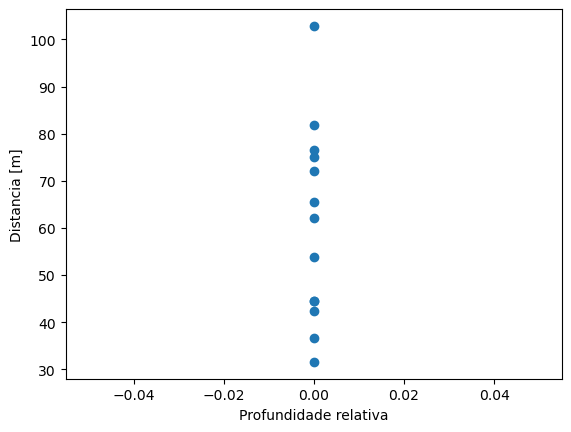

(array([0.]), 60.698568378589506)

In [367]:
distantece_y = np.array([ i[2] for i in vector_compare_radius_depth])
depth_x = np.array([ [i[3]] for i in vector_compare_radius_depth])

plt.scatter(depth_x,distantece_y)

distanceLR = LinearRegression().fit(depth_x,distantece_y)

plt.plot(depth_x, depth_x * distanceLR.coef_[0] + distanceLR.intercept_, 'r:')
plt.xlabel("Profundidade relativa")
plt.ylabel("Distancia [m]")
plt.show()


distanceLR.coef_ , distanceLR.intercept_ 